<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров" data-toc-modified-id="Изучение-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров</a></span></li><li><span><a href="#Анализ-времени-продажи-квартир" data-toc-modified-id="Анализ-времени-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Анализ времени продажи квартир</a></span></li><li><span><a href="#Избавление-от-выбивающихся-значений" data-toc-modified-id="Избавление-от-выбивающихся-значений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Избавление от выбивающихся значений</a></span></li><li><span><a href="#Анализ-влияния-параметров-на-цену" data-toc-modified-id="Анализ-влияния-параметров-на-цену-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ влияния параметров на цену</a></span></li><li><span><a href="#Определение-населенных-пунктов-с-самой-дорогой-ценой-квадратного-метра-и-самой-дешёвой" data-toc-modified-id="Определение-населенных-пунктов-с-самой-дорогой-ценой-квадратного-метра-и-самой-дешёвой-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Определение населенных пунктов с самой дорогой ценой квадратного метра и самой дешёвой</a></span></li><li><span><a href="#Выявление-&quot;центра-Санкт-Петербурга&quot;" data-toc-modified-id="Выявление-&quot;центра-Санкт-Петербурга&quot;-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выявление "центра Санкт-Петербурга"</a></span></li><li><span><a href="#Анализ-параметров-для-центра-Санкт-Петербурга" data-toc-modified-id="Анализ-параметров-для-центра-Санкт-Петербурга-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Анализ параметров для центра Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('real_estate_data.csv', sep='\t')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
df.loc[df['rooms'] == 19]
df.loc[df['floors_total'] == 60]
df.loc[df['last_price'] == 7.630000e+08]
df.loc[df['floor'] == 33]
df.loc[df['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


### Вывод

Данные в таблице оказались "склееными" в одну строку. Для вывода таблица пришлось использовать параметр sep='\t'. Сразу в глаза бросается большое количество пропусков. Самое большое число пропусков в столбце "balcony", возможно количество балконов не указывали, если их в квартире нет, так как это важный фатор при продаже квартиры, значит отсутствующие значение балконов можно будет заменить на 0. Другие пропуски не так однозначны. Также в глаза бросаются странные значения: квартира с 19 комнатами, квартира за 763 миллиона, квартира с высотой потолков 100 метров, 60 этажное здание в Кронштадт (в Санкт-Птербурге столько этажей только в Лахта-центре), это больше похоже на опечатку (хотели написать 6), квартира как раз на 4 этаже, что умещается в этажность.

## Предобработка данных

In [5]:
df['balcony'].fillna('0').astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заменим пропущенные значение в столбце "Балкон" на 0 и поменяем тип на integer. 

In [6]:
df['locality_name'].unique()
#len(df['locality_name'].unique())
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок')
len(df['locality_name'].unique()) 
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино', 'Мурино')
len(df['locality_name'].unique()) 

330

Проверив уникальные значения столбца 'locality_name', обнаруживаем, что некоторые населенные пункты отличаются использованием буквы ё с точками в названии "посёлок", а также "поселок Мурино" фигурирует как "Мурино". Сделав замену, уменьшим количество уникальных названий с 365 до 330.

In [7]:
df.duplicated().sum()

0

Поиск дубликатов. Так как дома чаще всего строятся по типовым проектам, то у большого количества параметров возможно совпадение, а цену часто выставляют по аналогии с ценой на квартиру с идентичными параметрами в одном районе.  

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
df['floors_total'] = df['floors_total'].astype('int')

len(df[df['floors_total'].isna()])

#df.info()

0

Пропуски в "Высоте потолков" и "Количестве этажей" заменим на медианное значение. И изменим тип "Количестве этажей" на целочисленный int.

## Расчёты и добавление результатов в таблицу

Рассчитаем и добавим столбец со значение цены за 1 квадратный метр.

In [9]:
df['square_meter'] = df['last_price'] / df['total_area']

Добавим столбцы: День недели, Месяц и Год продажи.

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,weekday,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Создадим столбец со значением этажа: первый (first), последний (last) и другой (other)

In [11]:
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    return 'other'
df['floor_cat'] = df.apply(floor_cat, axis=1)
df.head(10)        

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter,weekday,month_exposition,year_exposition,floor_cat
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,other
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,first
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,other
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,other
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,other
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55.0,95065.789474,0,9,2018,other
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,0.0,NaN,0.0,NaN,155.0,99195.710456,3,11,2017,other
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,other
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189.0,87454.764777,2,5,2018,other
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,other


Создадим сталбцы "Отношение жилой площади к общей" и "Отношение площади кухни к общей площади"

In [12]:
df['living_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter,weekday,month_exposition,year_exposition,floor_cat,living_area_ratio,kitchen_area_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,NaN,...,0.0,NaN,81.0,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,NaN,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,other,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,other,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,NaN,...,NaN,NaN,55.0,95065.789474,0,9,2018,other,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,NaN,...,0.0,NaN,155.0,99195.710456,3,11,2017,other,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,NaN,22,NaN,...,0.0,NaN,NaN,110544.692737,3,4,2019,other,NaN,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,NaN,...,NaN,NaN,189.0,87454.764777,2,5,2018,other,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,0.0,NaN,289.0,88524.590164,6,2,2017,other,0.714754,0.106557


## Исследовательский анализ данных

### Изучение параметров

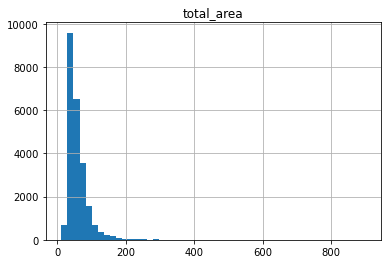

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [13]:
df['total_area'].hist(bins=50)
plt.title('total_area')
plt.show()
df['total_area'].describe()

Распределение площади квартир нормальное. Видно, что число квартир больше 200 м2 минимальное.

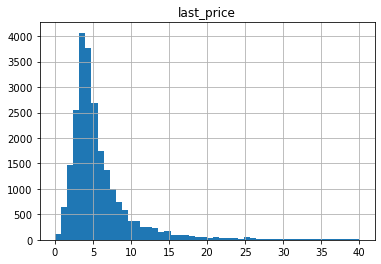

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [14]:
price = df['last_price'] / 1000000
#price.hist(bins=50)
price.hist(bins=50, range=(0, 40))
plt.title('last_price')
plt.show()
price.describe()

Переведем цену на квартиры в миллионы рублей, для удобства. За счет малого количества очень дорогих квартир гистограмма выглядит неудобной для визуального анализа. Заметно, что большинство квартир умещается в диапазоне до 40 миллионов, так что можно вывести гистограмму этого диапазона. И сразу видно, что у данных нормальное распределение. 

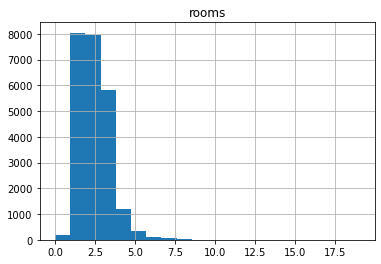

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [15]:
df['rooms'].hist(bins=20)
plt.title('rooms')
plt.show()
df['rooms'].describe()


Большинство квартир имеет 1-3 комнаты. Есть артифакты в виде 0 комнат (скорее всего это апартаменты), и квартиры с 19 комнатами (хотя такое возможно).

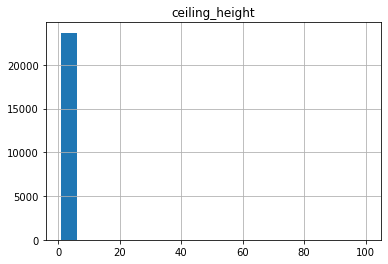

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [16]:
df['ceiling_height'].hist(bins=20)
plt.title('ceiling_height')
plt.show()
df['ceiling_height'].describe()

In [17]:
df['ceiling_height'].unique()
len(df.query('ceiling_height <= 5')) / len(df)

0.9984809485632306

Питер славится своими историческими квартирами с потолками по 5 метров, но потолки по 100 метров - явные артефакты. Значения 27, 32, можно еще объяснить пропущенной запятой. 99% квартир с потолками до 5 метров.

### Анализ времени продажи квартир

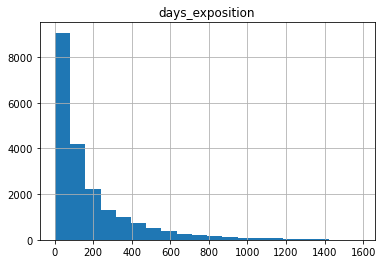

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [18]:
df['days_exposition'].hist(bins=20)
plt.title('days_exposition')
plt.show()
df['days_exposition'].describe()

In [19]:
df['locality_name'].loc[df['days_exposition'] == 1580]

18843    деревня Новое Девяткино
Name: locality_name, dtype: object

Среднее время продажи квартир - полгода, но на него сильно влияют квартиры, которые не продаются годами (как например, квартира в деревне Новое Девяткино, которая продавалась более 4 лет, хотя по данным из таблицы ничего необычного в ней нет, возможно проблемы с документами на квартиру, несовершеннолетние собственники, или же плохие соседи). Половина всех квартир продается за 3 месяца (медианное значение 95 дней). Судя по гистограмме большинство квартир продаются в течении года. Быстрой продажей квартиры можно считать продажу квартиры менее, чем за 45 дней (1 квартиль), а долгой - более, чем 252 дня (3 квартиль).

### Избавление от выбивающихся значений

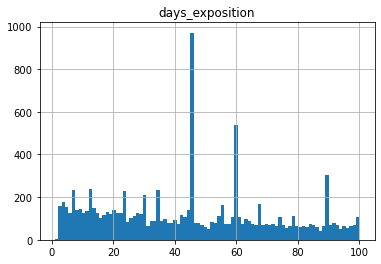

In [20]:
#df['days_exposition'].hist(bins=50, range=(1, 252))
df['days_exposition'].hist(bins=90, range=(1, 100))
plt.title('days_exposition')
plt.show()

Если ограничить диапазон цен на гистаграмме верхним квартилем, то видны 3 характерных пика на 45, 60 и 90. Поскольку гистаграмму мы строим по значениям до "снятия с публикации", то это не значит, что квартира была продана, возможно снятие в эти даты связано с правилами сервиса Яндекс.Неджвижимость. Возможно в эти даты взымается плата за последующее размещение или нужно какое-либо активное продление объявления, возможно корректировка данных, или ставится пометка, что квартира давно продается, что может насторожить и отпугнуть будущих покупателей.

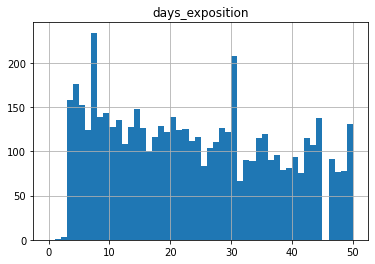

In [21]:
good_days_exposition = df
good_days_exposition['days_exposition'] = good_days_exposition['days_exposition'].fillna('0').astype('int')
#len(good_days_exposition['days_exposition'])
good_days_exposition_filtered = good_days_exposition.query('days_exposition not in (0, 45, 60, 90)')
good_days_exposition_filtered['days_exposition'].hist(bins=50, range=(0, 50))
plt.title('days_exposition')
plt.show()



После удаления "пиковых" данных о 45, 60 и 90 дне снятия объявления выявляются ещё 2 пика: это 7 день и 30.

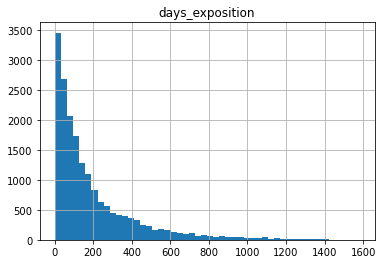

In [22]:
good_days_exposition_filtered = good_days_exposition.query('days_exposition not in (0, 7, 30, 45, 60, 90)')
good_days_exposition_filtered['days_exposition'].hist(bins=50)
good_days_exposition_filtered['days_exposition'].describe()
plt.title('days_exposition')
plt.show()

После удаления пиковых значений видно, что увеличилось среднее врямя продажи квартиры (195 дней) и медианное (114 дней), но нижний и верхний квартили почти не изменились.

### Анализ влияния параметров на цену

0.6536750579657242

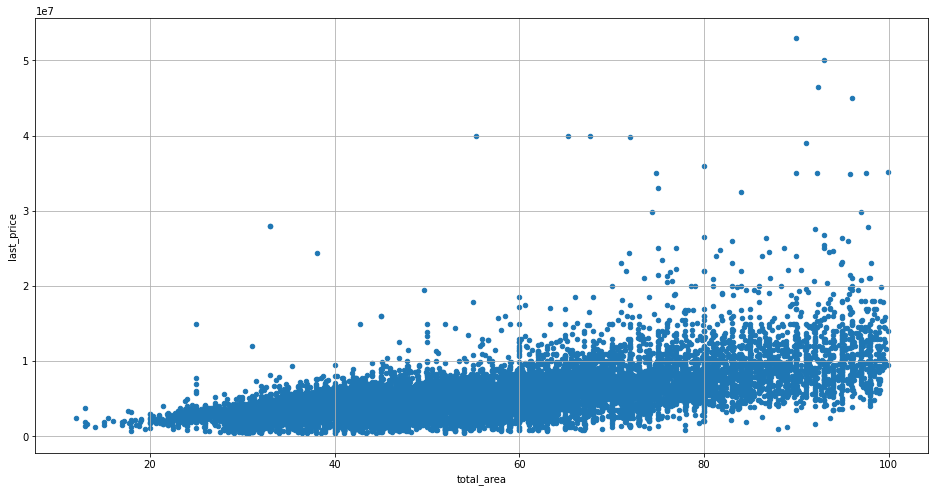

In [23]:

df.query('total_area < 100').plot(x='total_area', y='last_price', kind='scatter', figsize=(16, 8), sharex=False, grid=True) 
df['total_area'].corr(df['last_price'])

С увеличением площади цена растет незначительно сильно. Посмотрим как растет медианное значение цены.

<AxesSubplot:xlabel='total_area'>

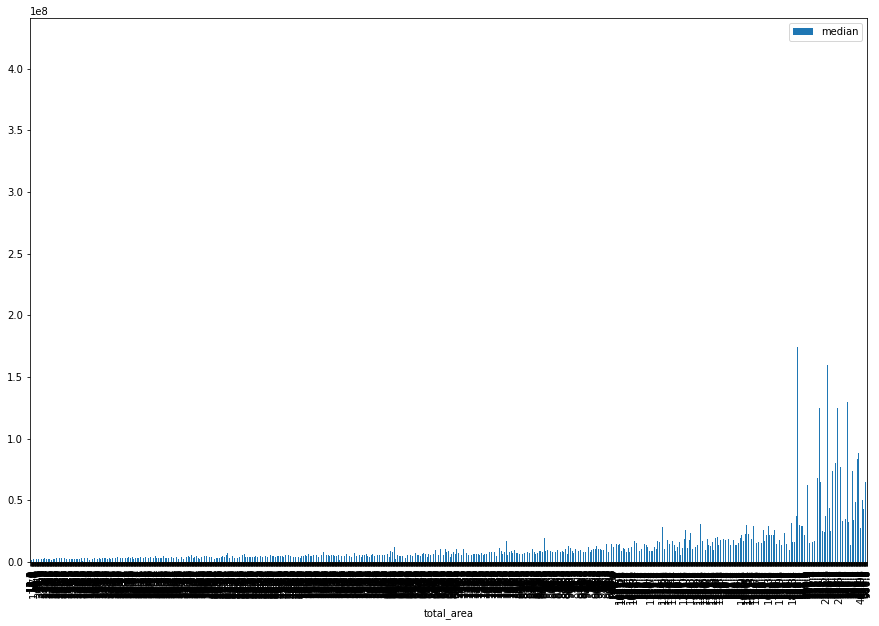

In [24]:
spb_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_total_area.columns = ['mean', 'count', 'median']
spb_total_area.plot(y = 'median', kind='bar', figsize=(15, 10))

Результат подтвердился

0.3633428499648955

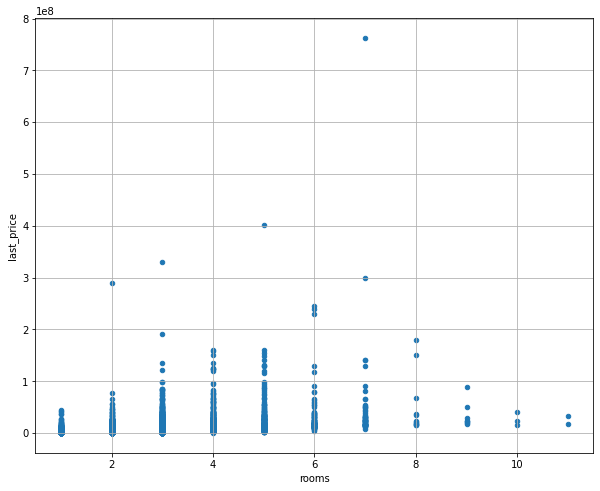

In [25]:
df.query('0 < rooms < 12').plot(x='rooms', y='last_price', kind='scatter', figsize=(10, 8), sharex=False, grid=True)
df['rooms'].corr(df['last_price'])

,mean,count,median
rooms,,,
0,3.337724e+06,197,2700000.0
1,3.835362e+06,8047,3600000.0
2,5.591605e+06,7940,4770169.0
3,8.179119e+06,5814,6200000.0
4,1.342350e+07,1180,9000000.0
5,2.376208e+07,326,14000000.0
6,3.170975e+07,105,19000000.0
7,5.147007e+07,59,24900000.0
8,5.022417e+07,12,23095000.0


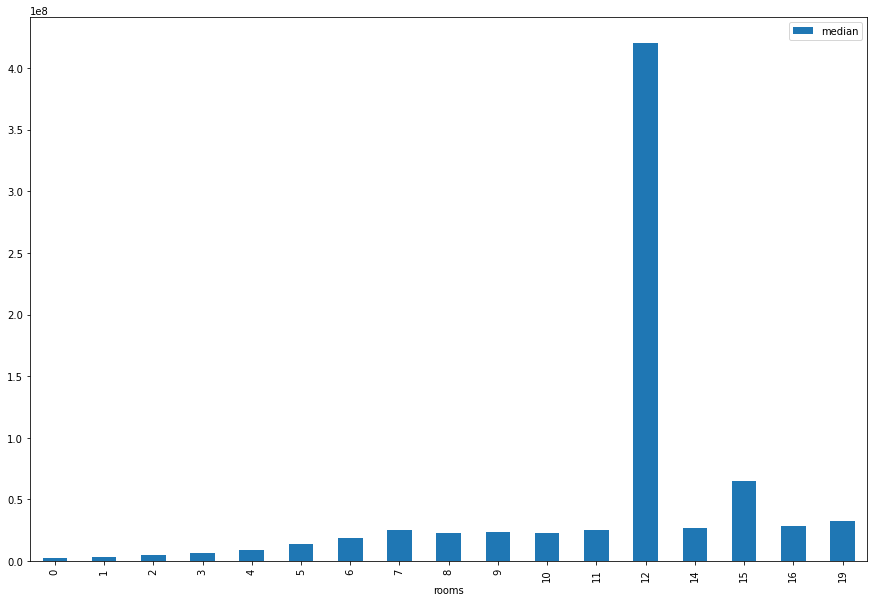

In [26]:
spb_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_rooms.columns = ['mean', 'count', 'median']
spb_rooms.plot(y = 'median', kind='bar', figsize=(15, 10))
spb_rooms

In [27]:
df.query('0 < rooms < 8')['rooms'].corr(df['last_price'])

0.35252748098846803

Количество комнат плохо коррелируется с ценой на квартиру. Хорошая корреляция с ценой кесть у квартир от 1 до 7 комнат. Но квартир с количеством комнат больше 7 очень мало (на корреляцию они не влияют), 12-комнатная квартира, вообще 1, и выбивается своей ценой.

-0.20674734874298364

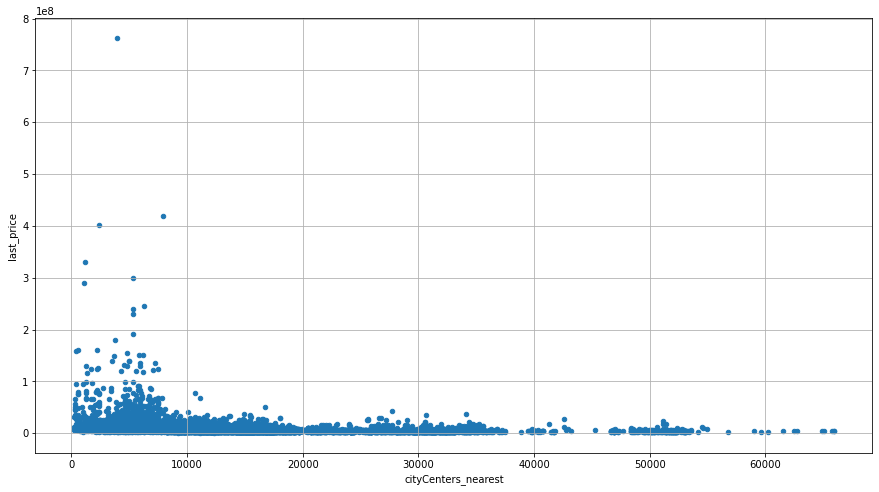

In [28]:
df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(15, 8), sharex=False, grid=True)
df['cityCenters_nearest'].corr(df['last_price'])

,mean,count,median
cityCenters_nearest,,,
181.0,31099000.0,1,31099000.0
208.0,5800000.0,1,5800000.0
215.0,10990000.0,1,10990000.0
287.0,9590000.0,1,9590000.0
291.0,11500000.0,1,11500000.0
...,...,...,...
64857.0,3650000.0,1,3650000.0
65105.0,3300000.0,1,3300000.0
65764.0,4000000.0,1,4000000.0


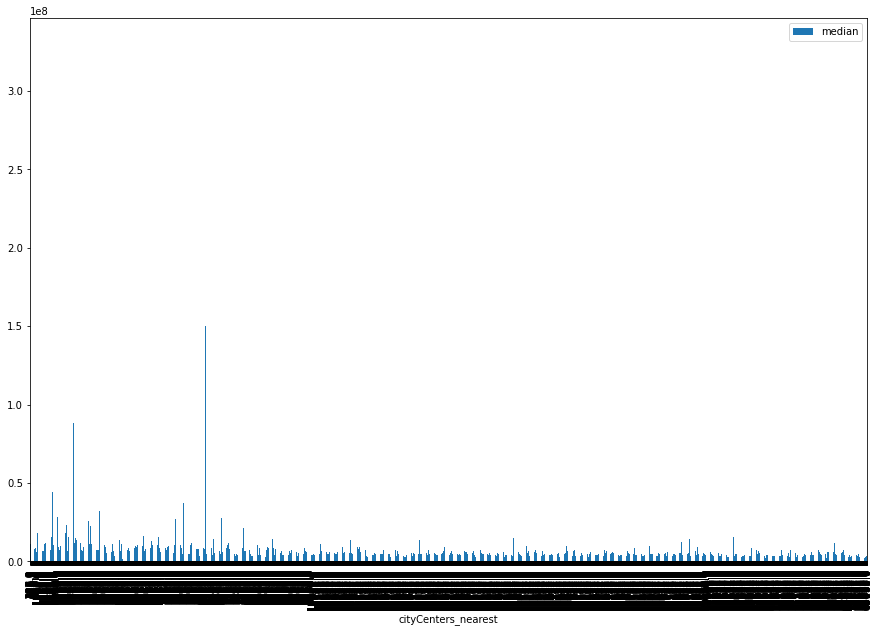

In [29]:
spb_cityCenters_nearest = df.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_cityCenters_nearest.columns = ['mean', 'count', 'median']
spb_cityCenters_nearest.plot(y = 'median', kind='bar', figsize=(15, 10))
spb_cityCenters_nearest

Корреляция оказалась отрицательной, что не удивительно, чем дальше квартира от центра города, тем ниже ее цена.

In [30]:
spb_floor_cat = df.pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_floor_cat.columns = ['mean', 'count', 'median']
spb_floor_cat

,mean,count,median
floor_cat,,,
first,4.803560e+06,2917,3900000.0
last,7.356777e+06,3341,4300000.0
other,6.676061e+06,17441,4850000.0


Обычно квартиры на первом и последнем этаже стоят дешевле из-за множества факторов (близость подвала, крыши и т.п.), но здесь мы видим странный результат для среднего значения квартир последнего этажа, возможно на это сказалась очень большая цена некоторых квартир (например пентхаусов и монсард). 

In [31]:
spb_floor_cat = df.query('last_price < 20000000').pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ['mean', 'count', 'median']) 
spb_floor_cat.columns = ['mean', 'count', 'median'] 
spb_floor_cat

,mean,count,median
floor_cat,,,
first,4.375615e+06,2875,3899000.0
last,5.122810e+06,3197,4200000.0
other,5.644939e+06,16904,4750000.0


Уберем квартиры стоимостью выше 20 миллионов (можно было бы ограничиться верхним квартилем 6,8 миллиона, но обрежем только очень дорогие квартиры) и средняя цена вписывается в логику.

0.0015501452176215436

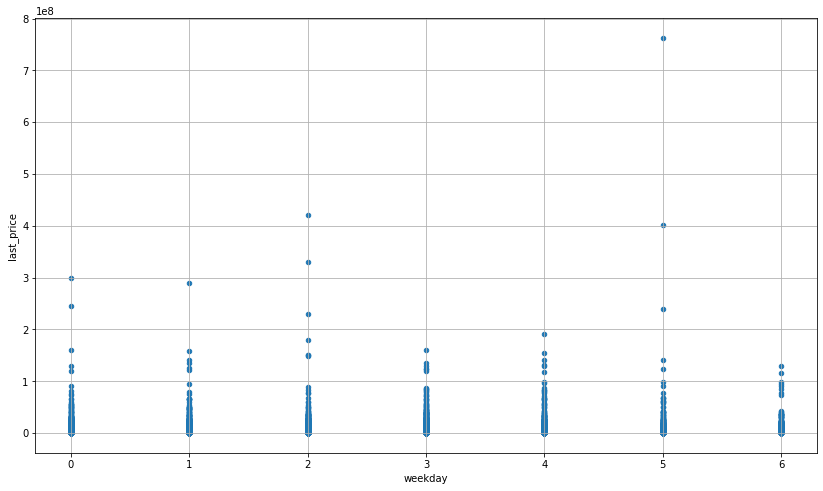

In [32]:
df.plot(x='weekday', y='last_price', kind='scatter', figsize=(14, 8), sharex=False, grid=True)
df['weekday'].corr(df['last_price'])

,mean,count,median
weekday,,,
0,6.511613e+06,3612,4650000.0
1,6.394233e+06,4183,4730000.0
2,6.627970e+06,3974,4700000.0
3,6.708663e+06,4295,4650000.0
4,6.372131e+06,4000,4585000.0
5,6.976804e+06,1936,4555000.0
6,6.246180e+06,1699,4550000.0


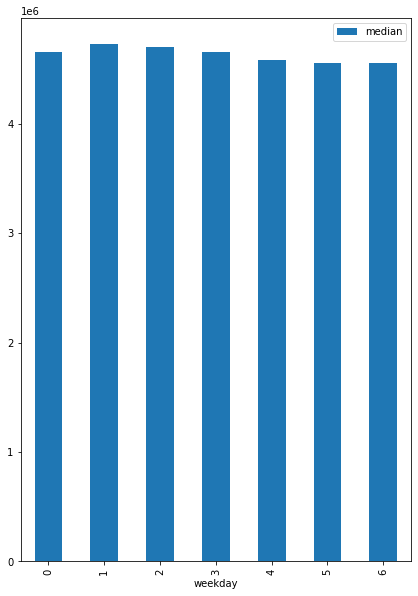

In [33]:
spb_weekday = df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_weekday.columns = ['mean', 'count', 'median']
spb_weekday.plot(y = 'median', kind='bar', figsize=(7, 10))
spb_weekday

0.0027791287507397235

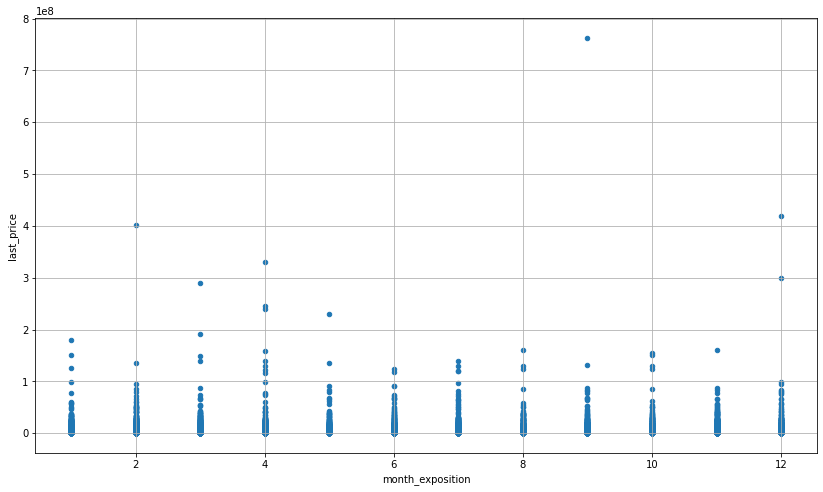

In [34]:
df.plot(x='month_exposition', y='last_price', kind='scatter', figsize=(14, 8), sharex=False, grid=True)
df['month_exposition'].corr(df['last_price'])

,mean,count,median
month_exposition,,,
1,6.668233e+06,1500,4600000.0
2,6.468500e+06,2640,4650000.0
3,6.359275e+06,2587,4650000.0
4,6.737198e+06,2379,4800000.0
5,6.600435e+06,1274,4515000.0
6,6.310269e+06,1760,4400000.0
7,6.649337e+06,1695,4650000.0
8,6.350233e+06,1744,4570000.0
9,6.825470e+06,1981,4700000.0


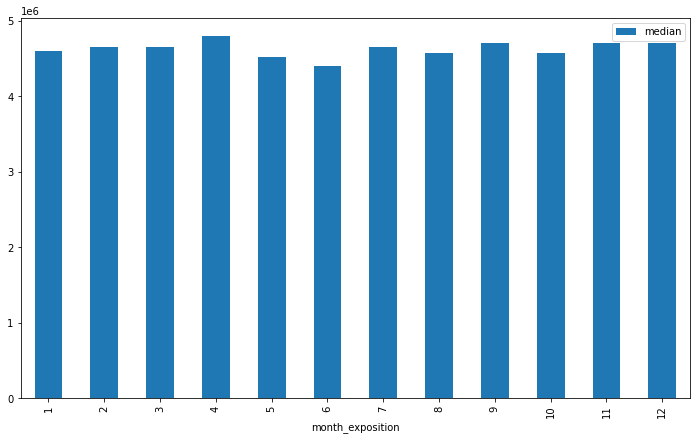

In [35]:
spb_month_exposition = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_month_exposition.columns = ['mean', 'count', 'median']
spb_month_exposition.plot(y = 'median', kind='bar', figsize=(12, 7))
spb_month_exposition

Зависимости цены квартиры от месяца и дня недели размещения объявления не удалось выявить.

-0.043089036199508574

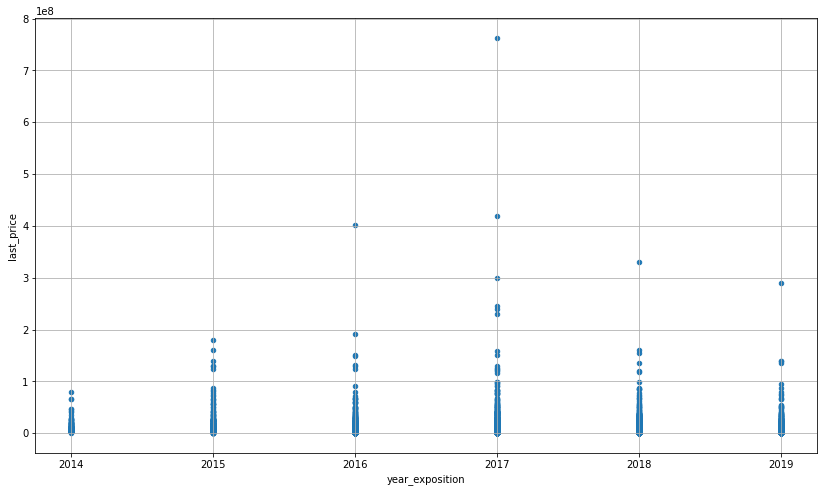

In [36]:
df.plot(x='year_exposition', y='last_price', kind='scatter', figsize=(14, 8), sharex=False, grid=True)
df['year_exposition'].corr(df['last_price'])

,mean,count,median
year_exposition,,,
2014,1.208714e+07,137,7700000.0
2015,8.572833e+06,1191,5350000.0
2016,6.827912e+06,2783,4550000.0
2017,6.585729e+06,8190,4500000.0
2018,5.950966e+06,8519,4550000.0
2019,6.782388e+06,2879,5050000.0


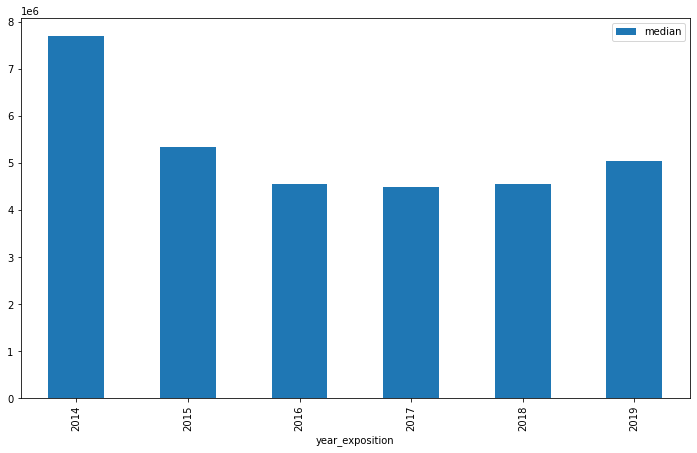

In [37]:
spb_year_exposition = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_year_exposition.columns = ['mean', 'count', 'median']
spb_year_exposition.plot(y = 'median', kind='bar', figsize=(12, 7))
spb_year_exposition

После 2014 года цены на квартиры резко упали, падали до 2016, а потом начали понемногу расти.

### Определение населенных пунктов с самой дорогой ценой квадратного метра и самой дешёвой

In [38]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table.sort_values('mean', ascending = False)


,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
Пушкин,369,103125.819291
деревня Кудрово,299,92473.547576
поселок Парголово,327,90175.913458
Мурино,590,86087.512050
поселок Шушары,440,78677.364217
Колпино,338,75424.579098
Гатчина,307,68746.146763
Всеволожск,398,68654.473986


Самый дорогой квадратный метр жилья в Санкт-Петербурге, а самый дешевый в Выборге (из 10 населенных пунктов с самым большим предложением жилья на продажу).

### Выявление "центра Санкт-Петербурга"

<AxesSubplot:xlabel='cityCenters_nearest_km'>

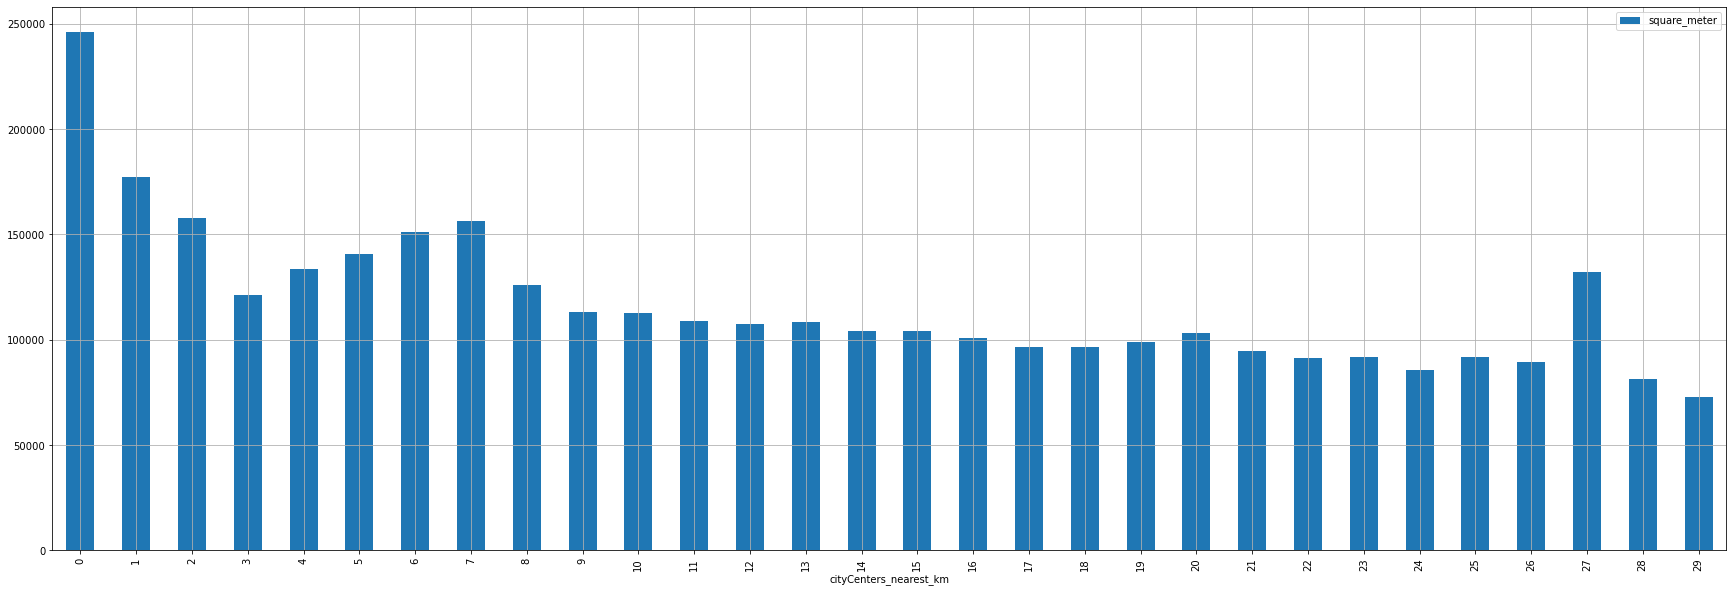

In [39]:
spb_centr = df.query('locality_name == "Санкт-Петербург"')
spb_centr = spb_centr[spb_centr['cityCenters_nearest'].notna()]
spb_centr['cityCenters_nearest_km'] = (spb_centr['cityCenters_nearest'] / 1000).round().astype('int')
spb_centr_pivot_table = spb_centr.pivot_table(index = 'cityCenters_nearest_km', values = 'square_meter', aggfunc='mean')
spb_centr_pivot_table.plot(y='square_meter', kind='bar', figsize=(30, 10), sharex=False, grid=True)

<AxesSubplot:xlabel='cityCenters_nearest_km'>

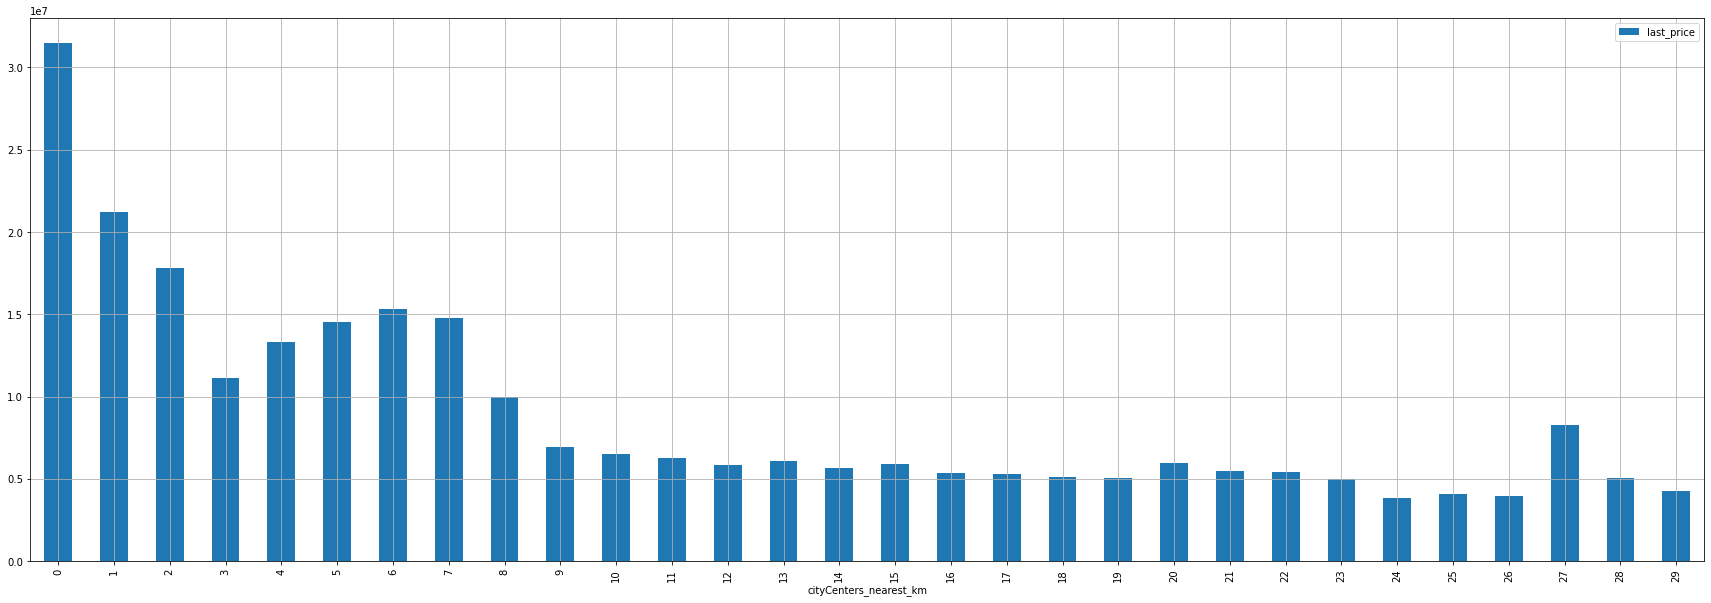

In [40]:
spb_centr = df.query('locality_name == "Санкт-Петербург"')
spb_centr = spb_centr[spb_centr['cityCenters_nearest'].notna()]
spb_centr['cityCenters_nearest_km'] = (spb_centr['cityCenters_nearest'] / 1000).round().astype('int')
spb_centr_pivot_table = spb_centr.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price', aggfunc='mean')
spb_centr_pivot_table.plot(y='last_price', kind='bar', figsize=(30, 10), sharex=False, grid=True)

Сделал 2 графика: зависимость квадратного метра и цены квартиры от удаления от центра города. На обоих графиках видно, что цена резко падает, начиная с 9 км (с не очень понятным просиданием на 3 километре). Так что центральной зоной можно считать территорию до 9 км от центра Санкт-Петербурга.

###  Анализ параметров для центра Санкт-Петербурга

Выделим квартиры, находящиеся в центре, и проанализируем параметры: площадь, цена, количество комнат и высота потолков, при помощи метода describe().

In [41]:
centr = spb_centr.query('cityCenters_nearest_km < 9')
centr['last_price_mln'] = centr['last_price'] / 1000000
centr['total_area'].describe()
import warnings
warnings.simplefilter('ignore')


<ipython-input-41-dd053bd9f795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centr['last_price_mln'] = centr['last_price'] / 1000000


In [42]:
centr['last_price_mln'].describe()

count    4122.000000
mean       14.180373
std        23.580489
min         1.600000
25%         6.450000
50%         8.960000
75%        13.900000
max       763.000000
Name: last_price_mln, dtype: float64

In [43]:
centr['rooms'].describe()

count    4122.000000
mean        2.757885
std         1.426035
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [44]:
centr['ceiling_height'].describe()

count    4122.000000
mean        2.963311
std         1.728423
min         2.000000
25%         2.650000
50%         2.800000
75%         3.100000
max       100.000000
Name: ceiling_height, dtype: float64

Посмотрим как разные факторы влияют на цену квартиры. Для наглядности построим график для медианы.

<AxesSubplot:xlabel='rooms'>

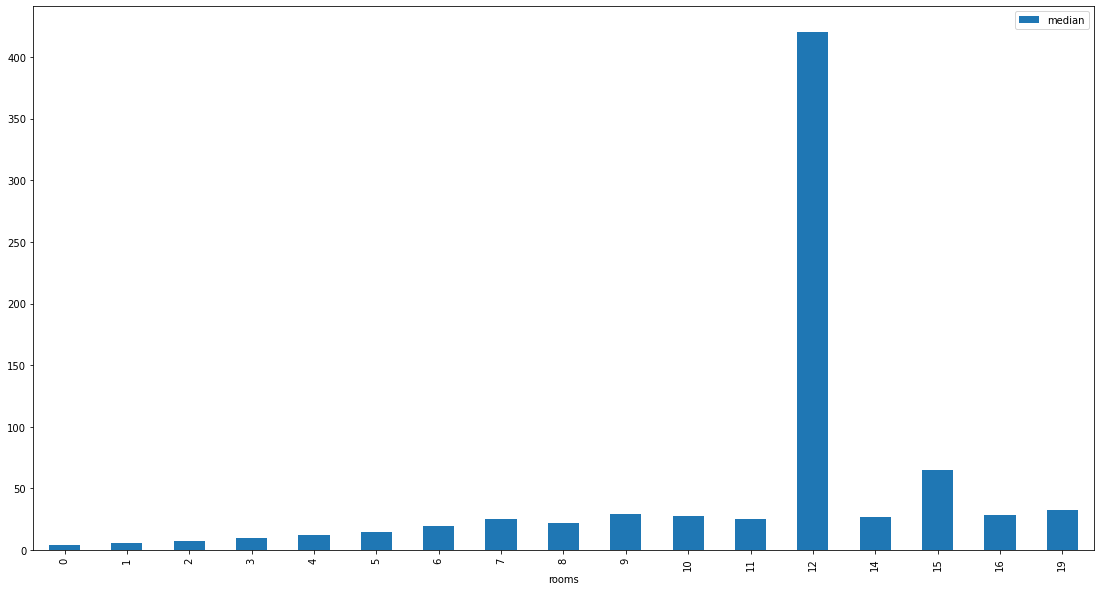

In [45]:
centr_rooms = centr.pivot_table(index = 'rooms', values = 'last_price_mln', aggfunc = ['mean', 'count', 'median'])
centr_rooms.columns = ['mean', 'count', 'median']
centr_rooms.plot(y = 'median', kind='bar', figsize=(19, 10))

In [53]:
centr.query('rooms == 12')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,square_meter,weekday,month_exposition,year_exposition,floor_cat,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km,last_price_mln
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,106,466666.666667,2,12,2017,last,0.455222,0.124444,8,420.0


Цена квартиры растет с увеличением количества комнат. Резкий выброс на 12 комнатах. Это всего одна квартира на последнем этаже 900 кв.м., скорее всего элитный пентхауз. 

<AxesSubplot:xlabel='floor'>

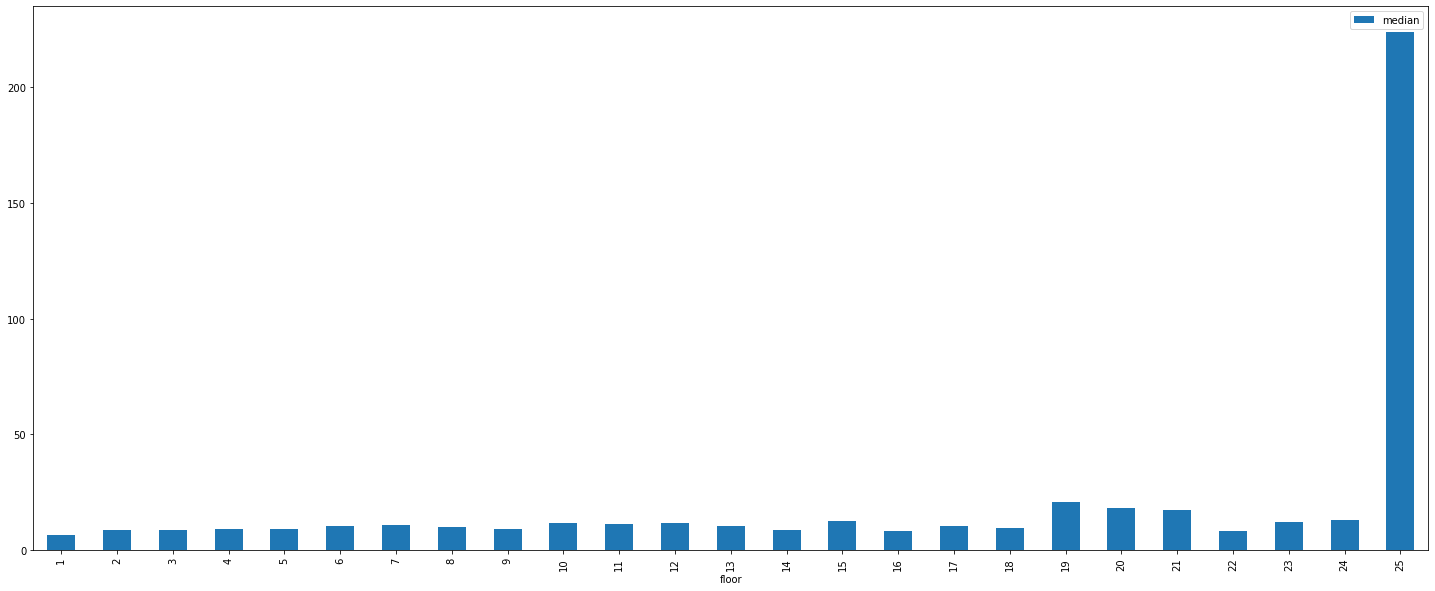

In [47]:
centr_floor = centr.pivot_table(index = 'floor', values = 'last_price_mln', aggfunc = ['mean', 'count', 'median'])
centr_floor.columns = ['mean', 'count', 'median']
centr_floor.plot(y = 'median', kind='bar', figsize=(25, 10))
#centr_floor

In [59]:
centr.loc[df['floor'] == 25]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,square_meter,weekday,month_exposition,year_exposition,floor_cat,living_area_ratio,kitchen_area_ratio,cityCenters_nearest_km,last_price_mln
147,10,27700000.0,179.6,2017-07-06,5,2.85,25,97.2,25,NaN,...,75,154231.625835,3,7,2017,last,0.541203,0.188196,4,27.7
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,NaN,...,106,466666.666667,2,12,2017,last,0.455222,0.124444,8,420.0


Этаж квартиры почти не влияет на цену, есть небольшое увеличение цены на квартиры с 19-21 этажи. И естесственно, золотой "пентхауз" на 25 этаже.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

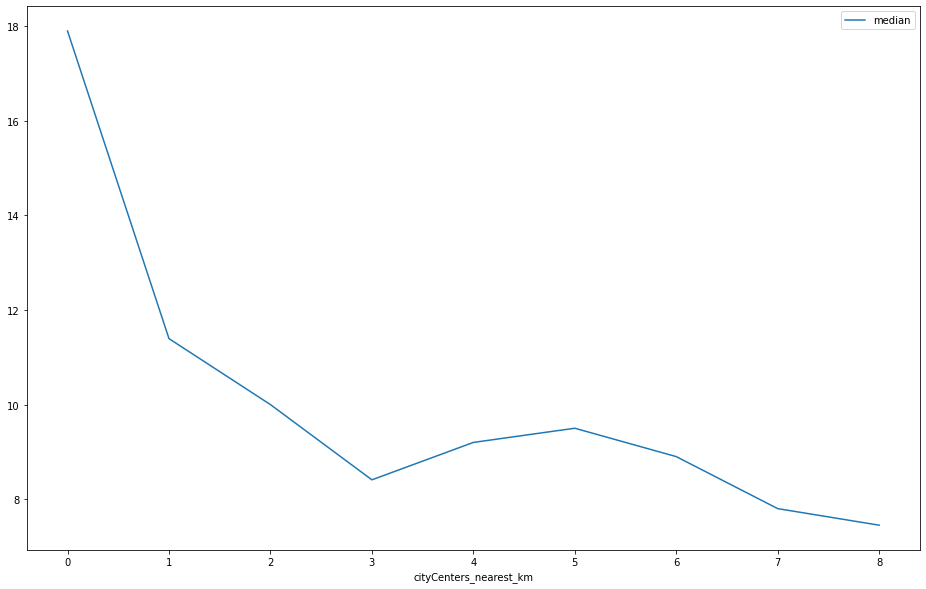

In [60]:
centr_cityCenters_nearest_km = centr.pivot_table(index = 'cityCenters_nearest_km', values = 'last_price_mln', aggfunc = ['mean', 'count', 'median'])
centr_cityCenters_nearest_km.columns = ['mean', 'count', 'median']
centr_cityCenters_nearest_km.plot(y = 'median', kind='line', figsize=(16, 10))
#centr_cityCenters_nearest

Опять этот 3 км, возможно за ним заканчивается исторический культурнозначимый центр, который интересен под сдачу в аренду независимо от качества квартиры, а дальше идут комфортные квартиры близкие к историческому центру, но уже более современной застройки с возможностью внесения изменений типа перепланировки или установки кондиционеров на фасадах, что запрещено в историческом центре

<AxesSubplot:xlabel='year_exposition'>

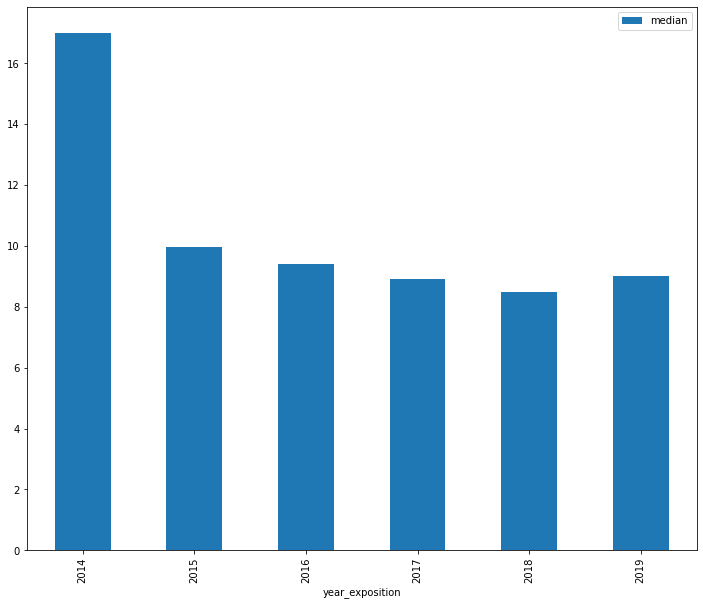

In [61]:
centr_year_exposition = centr.pivot_table(index = 'year_exposition', values = 'last_price_mln', aggfunc = ['mean', 'count', 'median'])
centr_year_exposition.columns = ['mean', 'count', 'median']
centr_year_exposition.plot(y = 'median', kind='bar', figsize=(12, 10))
#centr_year_exposition

<AxesSubplot:xlabel='year_exposition'>

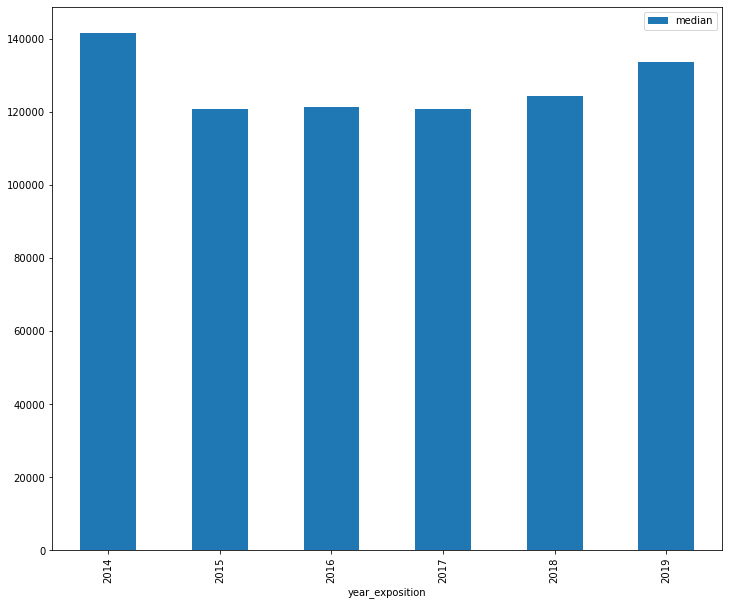

In [62]:
centr_year_exposition = centr.pivot_table(index = 'year_exposition', values = 'square_meter', aggfunc = ['mean', 'count', 'median'])
centr_year_exposition.columns = ['mean', 'count', 'median']
centr_year_exposition.plot(y = 'median', kind='bar', figsize=(12, 10))

После 2014 года цены на квартиры резко уменьшились, но потм потихоньку росли.

## Общий вывод

Проведен анализ данных сервиса Яндекс.Недвижимость. Выявлены аномалии в данных. Посчитаны и добавлены новые параметры. Также проведен анализ зависимости цены квартиры от различных параметров. Многие выводы нельзя считать окончательными и точными, так как нужна более точная сегментация данных, например не очень корректно смотреть зависимость цены от какого-то параметра опираясь на цены квартир разных лет. Также квартира на последнем этаже в центре Санкт-Петербурга с видами на храмы и дворцы, не то же самое, что последний этаж в "человейнике" в Мурино, где придется часами стоять в очередь на лифт. Так что зависимости лучше искать в более узких срезах, но данных тогда нужно больше.